In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv('train.csv')
data_train.shape

(1460, 81)

In [ ]:
data_test = pd.read_csv('test.csv')
data_test.shape

(1459, 80)

In [ ]:
data_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
data_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
a = data_train.duplicated().sum()
b = data_test.duplicated().sum()
print(a, b)

0 0


In [ ]:
data_nulls = (data_train.isnull().sum()/len(data_train))*100
nulls = data_nulls[data_nulls > 0]
print(nulls, len(nulls))

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64 19


In [ ]:
data_train.select_dtypes(include='object').isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [ ]:
data_train.select_dtypes(include=['float64', 'int64']).isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

Где есть нули:
1.  LotFrontage: Number (длина)
2.  Alley - 0 ~ NA 	(No alley access).
3. MasVnrType: 0 ~ None
4. MasVnrArea: Площадь облицовки каменной кладки в квадратных футах.
5. BsmtQual: 0 ~ NA 	(No Basement)
6. BsmtCond:0 ~ NA 	(No Basement)
7. BsmtExposure: 0 ~ NA 	(No Basement)
8. BsmtFinType1: 0 ~ NA 	(No Basement)
9. BsmtFinType2:0 ~ NA 	(No Basement)
10. Electrical: Electrical system. Не подразумевает 0

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
11. FireplaceQu: 0 ~ NA 	(No Fireplace)
12. GarageType: 0 ~ NA 	(No Garage)
13. GarageYrBlt: Number (год)

14. GarageFinish: 0 ~ NA 	(No Garage)
15. GarageQual: 0 ~ NA 	(No Garage)
16. GarageCond: 0 ~ NA 	(No Garage)
17. PoolQC: 0 ~ NA 	(No Pool)
18. Fence: 0 ~ NA 	(No Fence)  
19. MiscFeature: 0 ~ NA 	(None)



[5.54794521] [17.73972603]


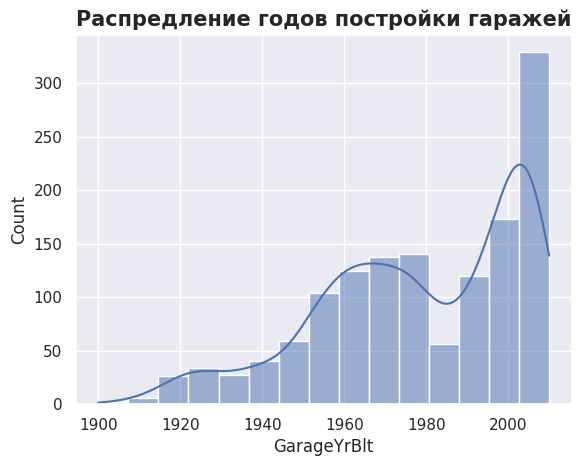

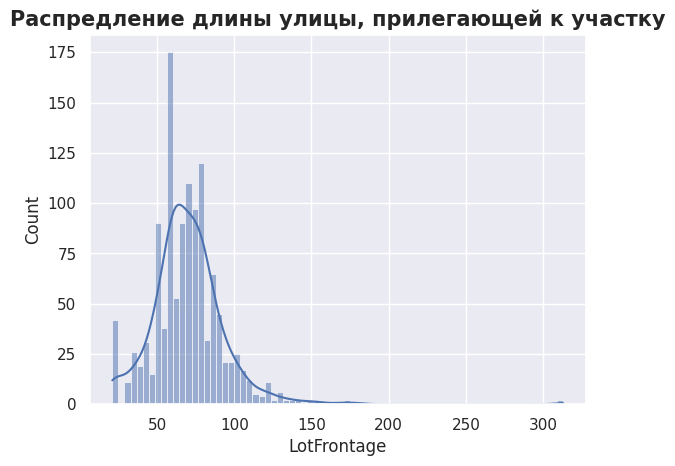

In [ ]:
#для числовых значений
d_nulls = (data_train['GarageYrBlt'].isnull().sum()/len(data_train))*100
null1 = d_nulls[d_nulls > 0]

d_nulls = (data_train['LotFrontage'].isnull().sum()/len(data_train))*100
null2 = d_nulls[d_nulls > 0]
print(null1, null2)

sns.set_theme()
sns.histplot(data=data_train , x=data_train['GarageYrBlt'] , kde=True)
plt.title(f'Распредление годов постройки гаражей', fontsize=15, fontweight='bold')
plt.show()

sns.set_theme()
sns.histplot(data=data_train , x=data_train['LotFrontage'] , kde=True)
plt.title(f'Распредление длины улицы, прилегающей к участку', fontsize=15, fontweight='bold')
plt.show()

Числовые значения:
GarageYrBlt - можно выбрать mean,
LotFrontage - можно выбрать mean


[59.7260274] [0.54794521] [0.06849315]


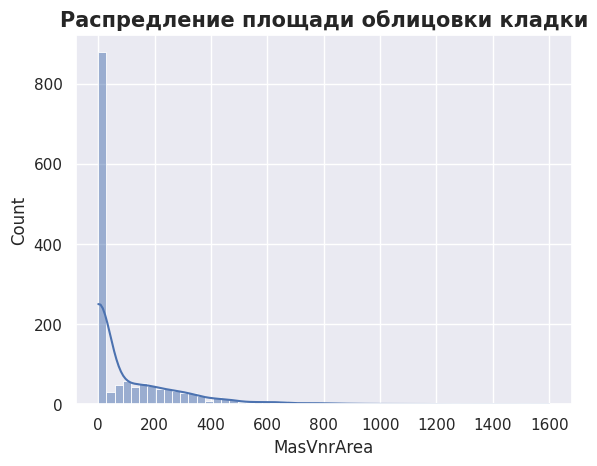

In [ ]:
#для объектных значений
d_nulls = (data_train['MasVnrType'].isnull().sum()/len(data_train))*100
null3 = d_nulls[d_nulls > 0]

d_nulls = (data_train['MasVnrArea'].isnull().sum()/len(data_train))*100
null4 = d_nulls[d_nulls > 0]

d_nulls = (data_train['Electrical'].isnull().sum()/len(data_train))*100
null5 = d_nulls[d_nulls > 0]
print(null3, null4, null5)

#вывожу только для MasVnrArea график, так как этот параметр имеет не категориальное, а числовое обозначение

sns.set_theme()
sns.histplot(data=data_train , x=data_train['MasVnrArea'] , kde=True)
plt.title(f'Распредление площади облицовки кладки', fontsize=15, fontweight='bold')
plt.show()


 MasVnrArea - есть выбросы, поэтому лучше заполнить медианой

MasVnrType, Electrical - заполнить модой

In [ ]:
cat_cols = data_train.select_dtypes(include='object').columns.tolist()
cat_train = pd.DataFrame(data_train[cat_cols].melt(var_name='column', value_name='value')
                      .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(data_train[cat_cols].describe())
display(cat_train)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


count
column    value        
Alley     Pave       41
          Grvl       50
BldgType  2fmCon     31
          Twnhs      43
          Duplex     52
...                 ...
SaleType  WD       1267
Street    Grvl        6
          Pave     1454
Utilities NoSeWa      1
          AllPub   1459

[251 rows x 1 columns]

In [ ]:
fill_NA=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
fill_mean=['LotFrontage', 'GarageYrBlt']
fill_mediane=['MasVnrArea']
fill_mode=['MasVnrType', 'Electrical']
for i in fill_NA:
  data_train[i]=data_train[i].fillna("NA")
for i in fill_mean:
  data_train[i]=data_train[i].fillna(data_train[i].mean())
for i in fill_mediane:
  data_train[i]=data_train[i].fillna(data_train[i].median())
for i in fill_mode:
  data_train[i]=data_train[i].fillna(data_train[i].value_counts().idxmax())
data_nulls = (data_train.isnull().sum()/len(data_train))*100
nulls = data_nulls[data_nulls > 0]
nulls

Series([], dtype: float64)

In [ ]:
fill_NA=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
fill_mean=['LotFrontage', 'GarageYrBlt']
fill_mediane=['MasVnrArea']
fill_mode=['MasVnrType', 'Electrical']
for i in fill_NA:
  data_test[i]=data_test[i].fillna("NA")
for i in fill_mean:
  data_test[i]=data_test[i].fillna(data_test[i].mean())
for i in fill_mediane:
  data_test[i]=data_test[i].fillna(data_test[i].median())
for i in fill_mode:
  data_test[i]=data_test[i].fillna(data_test[i].value_counts().idxmax())
data_nulls = (data_test.isnull().sum()/len(data_test))*100
nulls = data_nulls[data_nulls > 0]
nulls

MSZoning        0.27416
Utilities       0.13708
Exterior1st     0.06854
Exterior2nd     0.06854
BsmtFinSF1      0.06854
BsmtFinSF2      0.06854
BsmtUnfSF       0.06854
TotalBsmtSF     0.06854
BsmtFullBath    0.13708
BsmtHalfBath    0.13708
KitchenQual     0.06854
Functional      0.13708
GarageCars      0.06854
GarageArea      0.06854
SaleType        0.06854
dtype: float64

In [ ]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
data_train = data_train.drop('Id', axis = 1)
data_test = data_test.drop('Id', axis=1)
data_test.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal


Text(0.5, 1.0, 'Correlation Matrix')

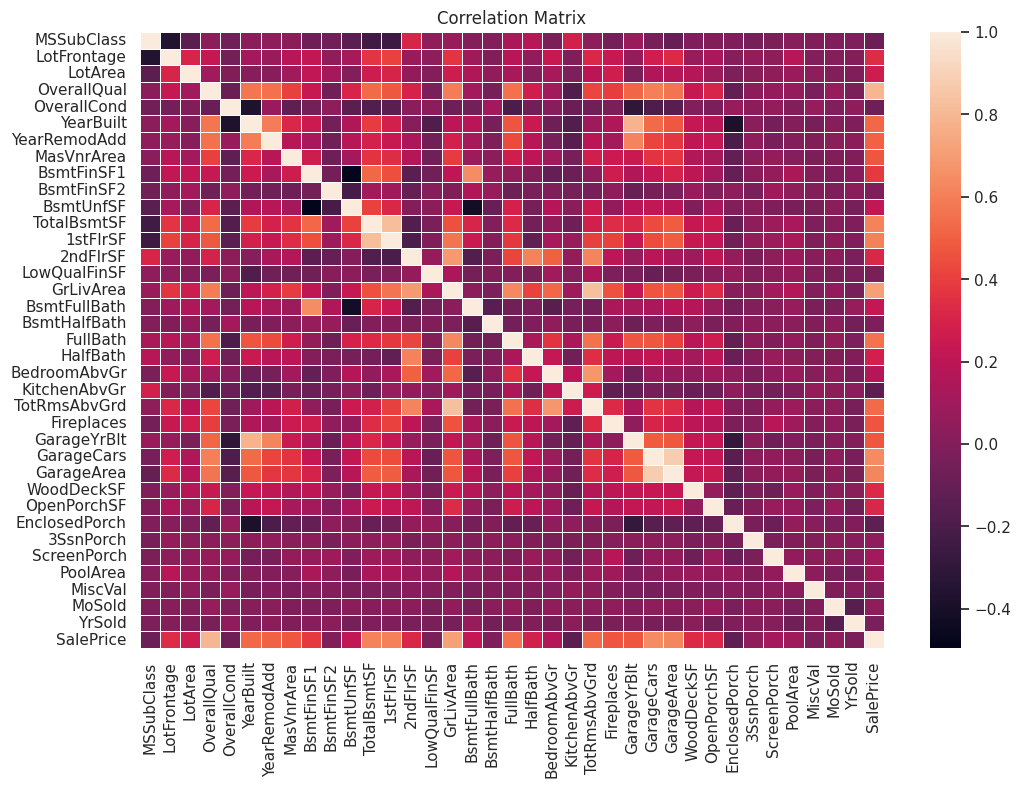

In [ ]:
numeric_columns = data_train.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

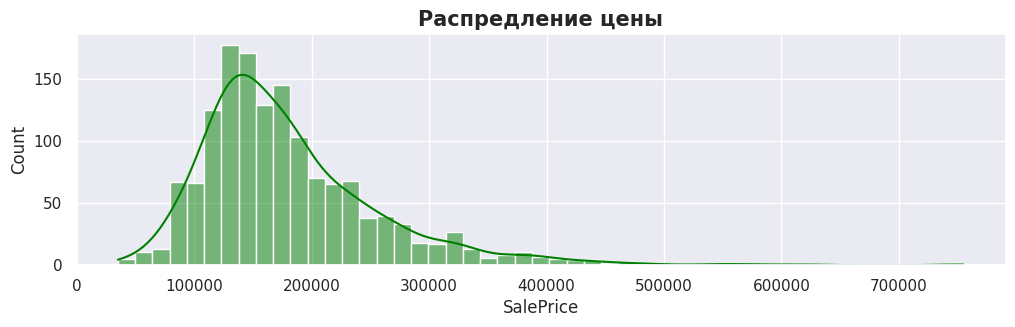

In [ ]:
sns.set_theme()
plt.figure(figsize=(12,3))
sns.histplot(data=data_train , x=data_train['SalePrice'] , kde=True, color='green')
plt.title(f'Распредление цены', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
data_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000000,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.000000,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.000000,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.000000,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000000,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,50,RL,85.000000,14115,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.000000,10084,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2007,WD,Normal,307000
7,60,RL,70.049958,10382,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.000000,6120,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
9,190,RL,50.000000,7420,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,1,2008,WD,Normal,118000


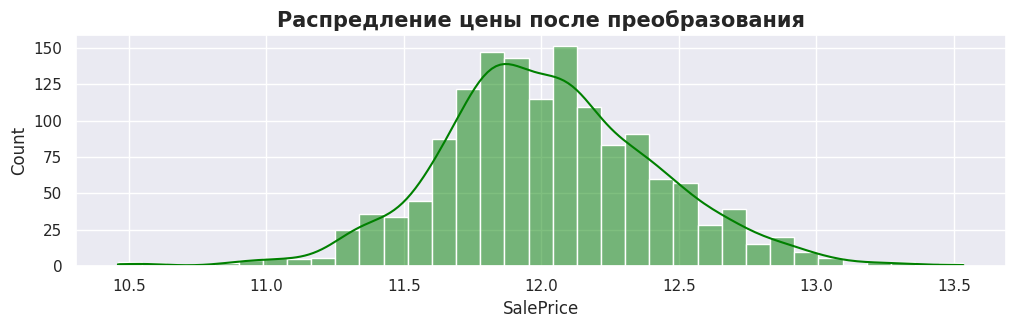

In [ ]:
data_train['SalePrice']=np.log1p(data_train['SalePrice'])

sns.set_theme()
plt.figure(figsize=(12,3))
sns.histplot(data=data_train , x=data_train['SalePrice'] , kde=True, color='green')
plt.title(f'Распредление цены после преобразования', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
for c in cat_cols:
    lbl = LabelEncoder()
    lbl.fit(list(data_train[c].values))
    data_train[c] = lbl.transform(list(data_train[c].values))
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,12.247699
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,12.109016
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,12.317171
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,11.849405
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,12.429220


In [ ]:
for c in cat_cols:
    lbl = LabelEncoder()
    lbl.fit(list(data_test[c].values))
    data_test[c] = lbl.transform(list(data_test[c].values))
data_test.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.000000,11622,1,1,3,3,0,4,...,120,0,2,2,1,0,6,2010,8,4
1,20,3,81.000000,14267,1,1,0,3,0,0,...,0,0,2,4,0,12500,6,2010,8,4
2,60,3,74.000000,13830,1,1,0,3,0,4,...,0,0,2,2,1,0,3,2010,8,4
3,60,3,78.000000,9978,1,1,0,3,0,4,...,0,0,2,4,1,0,6,2010,8,4
4,120,3,43.000000,5005,1,1,0,1,0,4,...,144,0,2,4,1,0,1,2010,8,4
5,60,3,75.000000,10000,1,1,0,3,0,0,...,0,0,2,4,1,0,4,2010,8,4
6,20,3,68.580357,7980,1,1,0,3,0,4,...,0,0,2,0,3,500,3,2010,8,4
7,60,3,63.000000,8402,1,1,0,3,0,4,...,0,0,2,4,1,0,5,2010,8,4
8,20,3,85.000000,10176,1,1,3,3,0,4,...,0,0,2,4,1,0,2,2010,8,4
9,20,3,70.000000,8400,1,1,3,3,0,0,...,0,0,2,2,1,0,4,2010,8,4


Text(0.5, 1.0, 'Correlation Matrix')

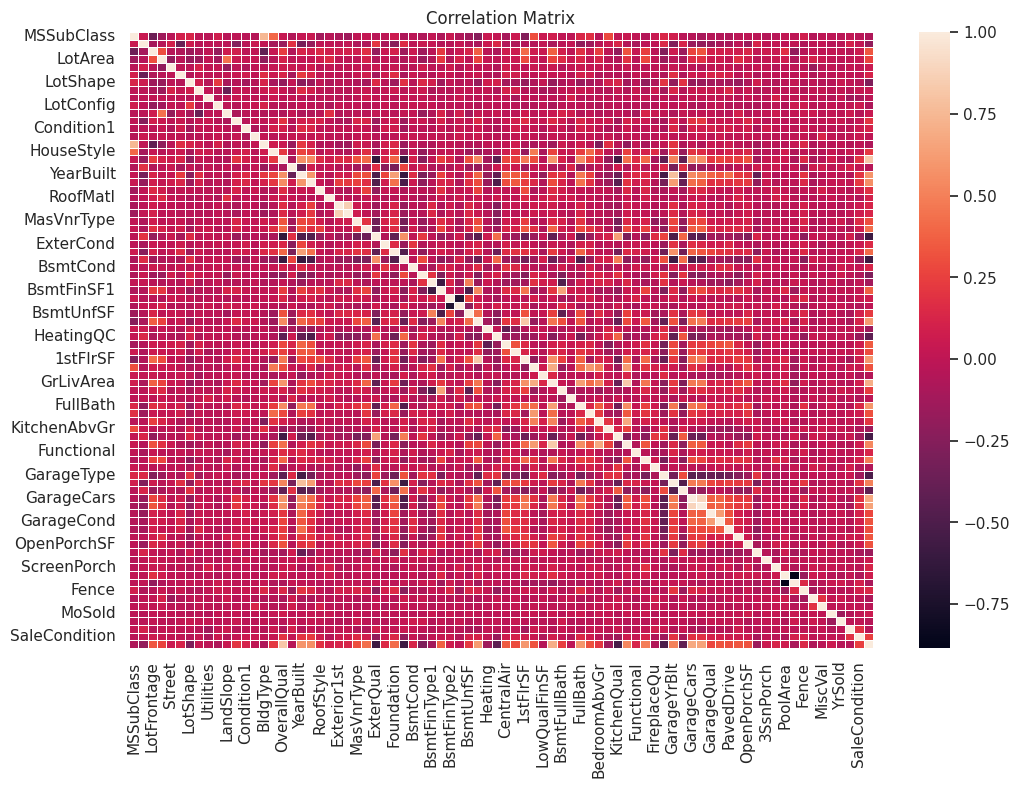

In [ ]:
correlation_matrix = data_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

Нормализация через апроксимацию на нормальных данных по методу Бокса Кокса. Нормализация по формуле normalized_X = (X - np.min(X)) / (np.max(X) - np.min(X)) дала менеее точные результаты, возможно результат был бы лучше при работе с выбраными параметрами, а не со всем фреймом.

In [ ]:
mean_y = data_train['SalePrice'].mean()
std_y = data_train['SalePrice'].std()

In [ ]:
from scipy.stats import skew
skewed_feats = data_train.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    data_train[feat] = boxcox1p(data_train[feat], lam)
data_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5.684507,1.540963,5.831328,19.212182,0.730463,0.730463,1.540963,1.540963,0.0,1.820334,...,0.0,1.540963,1.820334,0.730463,0.000000,1.194318,14.195323,2.602594,1.820334,3.156009
1,3.858807,1.540963,6.221214,19.712205,0.730463,0.730463,1.540963,1.540963,0.0,1.194318,...,0.0,1.540963,1.820334,0.730463,0.000000,2.055642,14.193765,2.602594,1.820334,3.140516
2,5.684507,1.540963,5.914940,20.347241,0.730463,0.730463,0.000000,1.540963,0.0,1.820334,...,0.0,1.540963,1.820334,0.730463,0.000000,2.750250,14.195323,2.602594,1.820334,3.163719
3,5.968981,1.540963,5.684507,19.691553,0.730463,0.730463,0.000000,1.540963,0.0,0.000000,...,0.0,1.540963,1.820334,0.730463,0.000000,1.194318,14.192207,2.602594,0.000000,3.111134
4,5.684507,1.540963,6.314735,21.325160,0.730463,0.730463,0.000000,1.540963,0.0,1.194318,...,0.0,1.540963,1.820334,0.730463,0.000000,3.128239,14.195323,2.602594,1.820334,3.176081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5.684507,1.540963,5.744420,18.960528,0.730463,0.730463,1.540963,1.540963,0.0,1.820334,...,0.0,1.540963,1.820334,0.730463,0.000000,2.602594,14.193765,2.602594,1.820334,3.136418
1456,3.858807,1.540963,6.337529,20.994868,0.730463,0.730463,1.540963,1.540963,0.0,1.820334,...,0.0,1.540963,1.194318,0.730463,0.000000,1.194318,14.198437,2.602594,1.820334,3.156806
1457,5.968981,1.540963,5.859551,19.476345,0.730463,0.730463,1.540963,1.540963,0.0,1.820334,...,0.0,1.540963,0.000000,1.540963,14.892193,2.055642,14.198437,2.602594,1.820334,3.183094
1458,3.858807,1.540963,5.914940,19.760176,0.730463,0.730463,1.540963,1.540963,0.0,1.820334,...,0.0,1.540963,1.820334,0.730463,0.000000,1.820334,14.198437,2.602594,1.820334,3.112853


In [ ]:
normalized_X = data_train.drop('SalePrice', axis = 1)
normalized_y = data_train['SalePrice']

In [ ]:
normalized_X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5.684507,1.540963,5.831328,19.212182,0.730463,0.730463,1.540963,1.540963,0.0,1.820334,...,0.0,0.0,1.540963,1.820334,0.730463,0.000000,1.194318,14.195323,2.602594,1.820334
1,3.858807,1.540963,6.221214,19.712205,0.730463,0.730463,1.540963,1.540963,0.0,1.194318,...,0.0,0.0,1.540963,1.820334,0.730463,0.000000,2.055642,14.193765,2.602594,1.820334
2,5.684507,1.540963,5.914940,20.347241,0.730463,0.730463,0.000000,1.540963,0.0,1.820334,...,0.0,0.0,1.540963,1.820334,0.730463,0.000000,2.750250,14.195323,2.602594,1.820334
3,5.968981,1.540963,5.684507,19.691553,0.730463,0.730463,0.000000,1.540963,0.0,0.000000,...,0.0,0.0,1.540963,1.820334,0.730463,0.000000,1.194318,14.192207,2.602594,0.000000
4,5.684507,1.540963,6.314735,21.325160,0.730463,0.730463,0.000000,1.540963,0.0,1.194318,...,0.0,0.0,1.540963,1.820334,0.730463,0.000000,3.128239,14.195323,2.602594,1.820334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5.684507,1.540963,5.744420,18.960528,0.730463,0.730463,1.540963,1.540963,0.0,1.820334,...,0.0,0.0,1.540963,1.820334,0.730463,0.000000,2.602594,14.193765,2.602594,1.820334
1456,3.858807,1.540963,6.337529,20.994868,0.730463,0.730463,1.540963,1.540963,0.0,1.820334,...,0.0,0.0,1.540963,1.194318,0.730463,0.000000,1.194318,14.198437,2.602594,1.820334
1457,5.968981,1.540963,5.859551,19.476345,0.730463,0.730463,1.540963,1.540963,0.0,1.820334,...,0.0,0.0,1.540963,0.000000,1.540963,14.892193,2.055642,14.198437,2.602594,1.820334
1458,3.858807,1.540963,5.914940,19.760176,0.730463,0.730463,1.540963,1.540963,0.0,1.820334,...,0.0,0.0,1.540963,1.820334,0.730463,0.000000,1.820334,14.198437,2.602594,1.820334


In [ ]:
lr = 0.00002
epochs= 25000
w = np.zeros(normalized_X.shape[1])
b = 0

def MSE(normalized_y, y_pred):
    return np.mean((normalized_y - y_pred) ** 2)

for i in range (epochs):
    y_pred = np.dot(normalized_X, w) + b
    loss = MSE(normalized_y, y_pred)

    #производные по весу и по bias(смещениям)
    der_w = (1 / normalized_X.shape[1]) * (2 * np.dot(normalized_X.T, (y_pred-normalized_y)))
    der_b = (1 / normalized_X.shape[1]) * (2 * np.sum(y_pred-normalized_y))

    #обновление весов и bias
    w -= lr * der_w
    b -= lr * der_b

    #вывод ошибки
    if (i + 1) % 1000 == 0:
        print(f'Эпоха [{i + 1}/{epochs}], Потери: {loss}')

Эпоха [1000/25000], Потери: 0.0008587731410513596
Эпоха [2000/25000], Потери: 0.0005545960379516684
Эпоха [3000/25000], Потери: 0.0004323030892824585
Эпоха [4000/25000], Потери: 0.0003688478144499336
Эпоха [5000/25000], Потери: 0.00033139189411273535
Эпоха [6000/25000], Потери: 0.00030719467643803455
Эпоха [7000/25000], Потери: 0.000290490598421604
Эпоха [8000/25000], Потери: 0.00027836462732308364
Эпоха [9000/25000], Потери: 0.0002692123532587004
Эпоха [10000/25000], Потери: 0.00026208853748382037
Эпоха [11000/25000], Потери: 0.0002564039562291836
Эпоха [12000/25000], Потери: 0.0002517734548470735
Эпоха [13000/25000], Потери: 0.0002479350459140304
Эпоха [14000/25000], Потери: 0.000244704533762523
Эпоха [15000/25000], Потери: 0.00024194884724526155
Эпоха [16000/25000], Потери: 0.0002395696837428713
Эпоха [17000/25000], Потери: 0.0002374930806243568
Эпоха [18000/25000], Потери: 0.00023566253181186284
Эпоха [19000/25000], Потери: 0.00023403430480397445
Эпоха [20000/25000], Потери: 0.0002

In [ ]:
skewed_feats = data_test.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    data_test[feat] = boxcox1p(data_test[feat], lam)

In [ ]:
test_y_pred = np.dot(data_test, w) + b
predictions = (test_y_pred * std_y + mean_y)*100000
print('Предсказание:', predictions)

Предсказание: [1325850.41698533 1326710.04542294 1327888.87394978 ... 1327109.64927426
 1325600.04067933 1328776.33929422]


Линейная регрессия


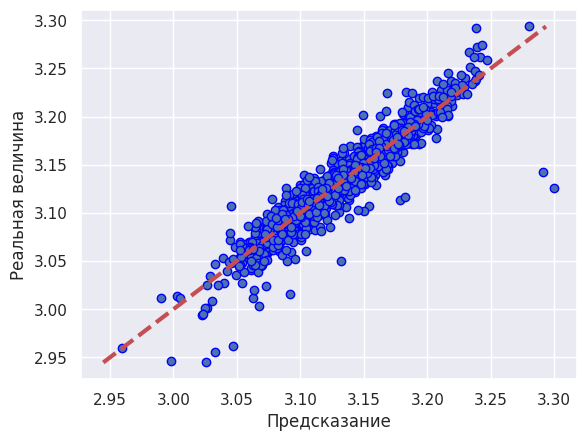

In [ ]:
print('Линейная регрессия')
fig, ax = plt.subplots()
ax.scatter(y_pred, normalized_y, edgecolors=(0, 0, 1))
ax.plot([normalized_y.min(), normalized_y.max()], [normalized_y.min(), normalized_y.max()], 'r--', lw=3)
ax.set_xlabel('Предсказание')
ax.set_ylabel('Реальная величина')
plt.show()

Предсказание по наиболее коррелирующимся параметрам.

Параметры с сильной корреляцией с SalePrice:
OverallQual
TotalBsmtSF
GrLivArea
GarageCars
GarageArea
SalePrice


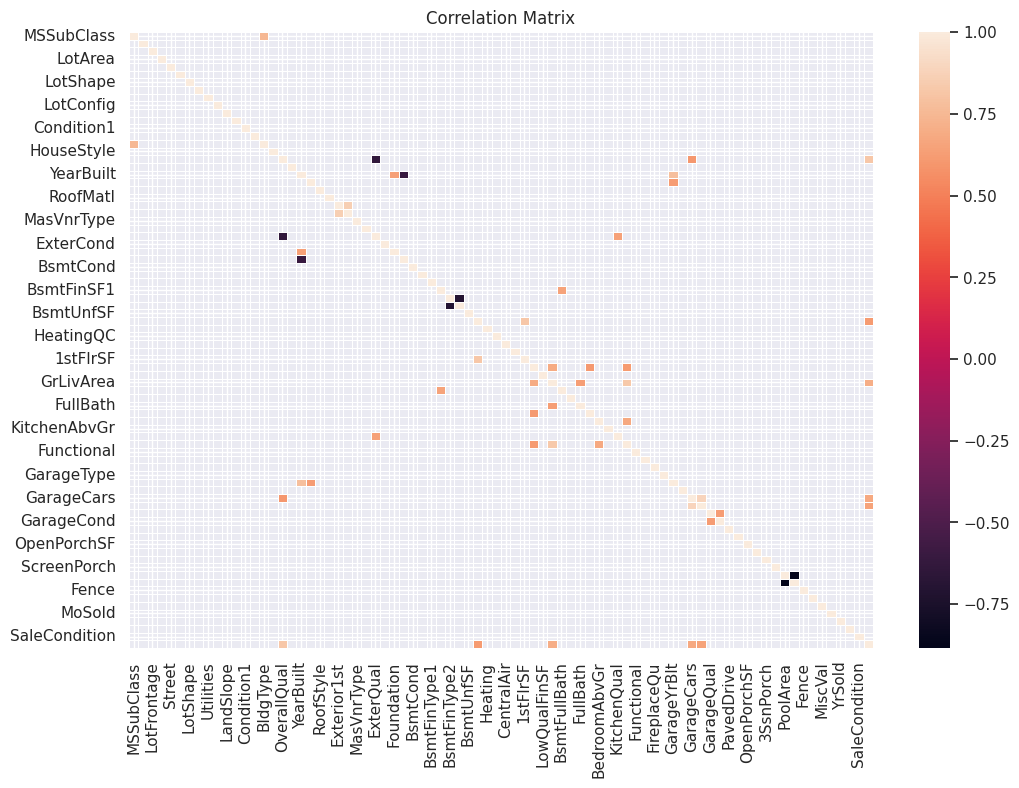

In [ ]:
threshold = 0.6
filtered_corr = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
strong_corr_cols = filtered_corr.columns
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
sale_price_corr = strong_corr_cols[filtered_corr['SalePrice'].abs() > threshold]
corr_list = sale_price_corr.tolist()
print("Параметры с сильной корреляцией с SalePrice:")
for param in corr_list:
    print(param)

In [ ]:
cols = ['OverallQual', 'ExterQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'SalePrice']
X = data_train[cols]
X

,OverallQual,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,2.440268,1.194318,11.692623,11.692623,13.698888,1.194318,10.506271,3.156009
1,2.259674,1.540963,12.792276,12.792276,12.792276,1.194318,10.062098,3.140516
2,2.440268,1.194318,11.892039,11.892039,13.832085,1.194318,10.775536,3.163719
3,2.440268,1.540963,11.354094,12.013683,13.711364,1.540963,10.918253,3.111134
4,2.602594,1.194318,12.510588,12.510588,14.480029,1.540963,11.627708,3.176081
...,...,...,...,...,...,...,...,...
1455,2.259674,1.540963,11.990298,11.990298,13.584606,1.194318,10.062098,3.136418
1456,2.259674,1.540963,13.385607,14.295205,14.295205,1.194318,10.272202,3.156806
1457,2.440268,0.000000,12.528113,12.616840,14.679454,0.730463,8.622254,3.183094
1458,2.055642,1.540963,12.338074,12.338074,12.338074,0.730463,8.511220,3.112853


In [ ]:
normalized_y = X['SalePrice']
normalized_X = X.drop('SalePrice', axis = 1)


# normalized_X = (X - np.min(X)) / (np.max(X) - np.min(X))
# normalized_y =  (y - np.min(y)) / (np.max(y) - np.min(y))

In [ ]:
lr = 0.000005
epochs= 25000
w = np.zeros(normalized_X.shape[1])
b = 0

def MSE(normalized_y, y_pred):
    return np.mean((normalized_y - y_pred) ** 2)

for i in range (epochs):
    y_pred = np.dot(normalized_X, w) + b
    loss = MSE(normalized_y, y_pred)

    #производные по весу и по bias(смещениям)
    der_w = (1 / normalized_X.shape[1]) * (2 * np.dot(normalized_X.T, (y_pred-normalized_y)))
    der_b = (1 / normalized_X.shape[1]) * (2 * np.sum(y_pred-normalized_y))

    #обновление весов и bias
    w -= lr * der_w
    b -= lr * der_b

    #вывод ошибки
    if (i + 1) % 1000 == 0:
        print(f'Эпоха [{i + 1}/{epochs}], Потери: {loss}')

Эпоха [1000/25000], Потери: 0.024295598941465154
Эпоха [2000/25000], Потери: 0.021891426806619676
Эпоха [3000/25000], Потери: 0.020354327844307126
Эпоха [4000/25000], Потери: 0.019312386007746807
Эпоха [5000/25000], Потери: 0.01856170578285875
Эпоха [6000/25000], Потери: 0.017987080260975737
Эпоха [7000/25000], Потери: 0.01752238340891643
Эпоха [8000/25000], Потери: 0.017129143609431713
Эпоха [9000/25000], Потери: 0.01678460645354828
Эпоха [10000/25000], Потери: 0.016475010225226655
Эпоха [11000/25000], Потери: 0.016191779292499327
Эпоха [12000/25000], Потери: 0.015929362079947114
Эпоха [13000/25000], Потери: 0.015683998570476594
Эпоха [14000/25000], Потери: 0.015453014076259899
Эпоха [15000/25000], Потери: 0.015234411478321356
Эпоха [16000/25000], Потери: 0.015026633136035755
Эпоха [17000/25000], Потери: 0.014828419584529963
Эпоха [18000/25000], Потери: 0.014638723735331798
Эпоха [19000/25000], Потери: 0.01445665715756806
Эпоха [20000/25000], Потери: 0.01428145511922571
Эпоха [21000/2

In [ ]:
cols2 =  ['OverallQual', 'ExterQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
test = data_test[cols2]
test_y_pred = np.dot(test, w) + b
predictions = (((test_y_pred * std_y + mean_y) * 100000))
print('Предсказание:', predictions)

Предсказание: [1323860.71459534 1331482.31761695 1326214.37801328 ... 1326584.57033156
 1323521.59356236 1330222.21697948]


Линейная регрессия


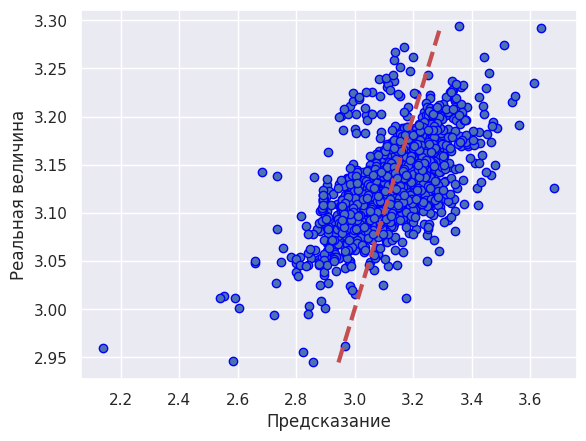

In [ ]:
print('Линейная регрессия')
fig, ax = plt.subplots()
ax.scatter(y_pred, normalized_y, edgecolors=(0, 0, 1))
ax.plot([normalized_y.min(), normalized_y.max()], [normalized_y.min(), normalized_y.max()], 'r--', lw=3)
ax.set_xlabel('Предсказание')
ax.set_ylabel('Реальная величина')
plt.show()

При обучении на полном наборе данных точность значительно выше.